In [175]:
# Import necessary packages
import numpy as np
import matplotlib.pyplot as plt


#the vaccination_rate is set to 0.1 and the immunity_rate is set to 0.05. This means that 10% of the population is vaccinated and 5% of the population develops immunity to the disease naturally.
# Define the transition function
def transition_function(state, noise_std, spread_rate, distancing_factor, recovery_rate, vaccination_rate, immunity_rate):
    # Update the state based on the current state, the noise term, the spread rate,
    # the distancing factor, the recovery rate, the vaccination rate, and the immunity rate
    next_state = state + state * spread_rate * (1 - distancing_factor) - state * recovery_rate - state * vaccination_rate - state * immunity_rate + np.random.normal(0, noise_std)
    # Ensure that the state remains within the valid range (0 to 1)
    next_state = max(0, min(1, next_state))
    return next_state


def second_transition_function(second_variable, second_noise_std, second_spread_rate, second_recovery_rate, second_vaccination_rate, second_immunity_rate):
    # Update the second variable based on its current value, the noise term, the spread rate,
    # the recovery rate, the vaccination rate, and the immunity rate
    next_second_variable = second_variable + second_variable * second_spread_rate - second_variable * second_recovery_rate - second_variable * second_vaccination_rate - second_variable * second_immunity_rate + np.random.normal(0, second_noise_std)
    # Ensure that the second variable remains within the valid range (0 to 1)
    next_second_variable = max(0, min(1, next_second_variable))
    return next_second_variable


class MarkovChain:
    def __init__(self, initial_state, transition_function, noise_std, spread_rate, distancing_factor, recovery_rate, vaccination_rate, immunity_rate, second_variable=0, second_transition_function=None,second_noise_std=0,second_spread_rate=0.1, second_distancing_factor=1.0,second_recovery_rate=0.1,second_vaccination_rate=0.1,second_immunity_rate=0.04):
        # Initialize the state, transition       # Initialize the state, transition function, noise standard deviation,
        # spread rate, distancing factor, recovery rate, vaccination rate, 
        # immunity rate, second variable, second transition function, and second noise standard deviation
        self.state = initial_state
        self.transition_function = transition_function
        self.noise_std = noise_std
        self.spread_rate = spread_rate
        self.distancing_factor = distancing_factor
        self.recovery_rate = recovery_rate
        self.vaccination_rate = vaccination_rate
        self.immunity_rate = immunity_rate
        self.second_variable = second_variable
        self.second_transition_function = second_transition_function
        self.second_noise_std = second_noise_std
        self.second_spread_rate = second_spread_rate
        self.second_distancing_factor = second_distancing_factor
        self.second_recovery_rate = second_recovery_rate
        self.second_vaccination_rate = second_vaccination_rate
        self.second_immunity_rate= second_immunity_rate

        
    def simulate(self, steps, step_size):
    # Simulate the evolution of the disease for the specified number of steps
        for _ in range(steps):
        # Update the state of the system based on the transition function
        # and the noise term
            self.state = self.transition_function(
                self.state,
                self.noise_std * step_size,
                self.spread_rate,
                self.distancing_factor,
                self.recovery_rate,
                self.vaccination_rate,
                self.immunity_rate)
            if self.second_transition_function is not None:
                self.second_variable = self.second_transition_function(
                    self.second_variable,
                    self.second_noise_std * step_size,
                    self.second_spread_rate,
                    self.second_recovery_rate,
                    self.second_vaccination_rate,
                    self.second_immunity_rate)
        return self.state, self.second_variable
    
    def plot_simulation(self, steps, step_size):
    # Initialize an array to store the values of the state at each step
        states = [self.state]
    # Simulate the evolution of the disease for the specified number of steps
        for _ in range(steps):
        # Update the state of the system based on the transition function
        # and the noise term
            self.state = self.transition_function(
                self.state,
                self.noise_std * step_size,
                self.spread_rate,
                self.distancing_factor,
                self.recovery_rate,
                self.vaccination_rate,
                self.immunity_rate)
        # Add the updated state to the states array
            states.append(self.state)
    # Plot the evolution of the disease over time
        plt.xlabel('Time (days)', fontsize=14, fontweight='bold')
        plt.ylabel('Proportion of population', fontsize=14, fontweight='bold')
        plt.title('Spread of disease through population', fontsize=16, fontweight='bold')
        plt.plot(states)
        plt.show()

    
    def plot_simulation_2(self, steps, step_size):
    # Initialize arrays to store the state and second variable at each step
        states = []
        second_variables = []
    
        # Simulate the evolution of the disease for the specified number of steps
        for _ in range(steps):
        # Update the state of the system based on the transition function
        # and the noise term
            self.state = self.transition_function(
                self.state,
                self.noise_std * step_size,
                self.spread_rate,
                self.distancing_factor,
                self.recovery_rate,
                self.vaccination_rate,
                self.immunity_rate)

        # Update the second variable based on its own transition function
        # and the noise term
            self.second_variable = self.second_transition_function(
                self.second_variable,
                self.second_noise_std * step_size,
                self.second_spread_rate,
                self.second_recovery_rate,
                self.second_vaccination_rate,
                self.second_immunity_rate)

        # Store the current state and second variable in the arrays
            states.append(self.state)
            second_variables.append(self.second_variable)

    # Plot the simulation results
        plt.plot(states, label='Infected')
        plt.plot(second_variables, label='Quarantined')
        plt.xlabel('Time (days)', fontsize=14, fontweight='bold')
        plt.ylabel('Proportion of population', fontsize=14, fontweight='bold')
        plt.title('Spread of disease and vaccination through population', fontsize=16, fontweight='bold')
        plt.legend()
        plt.show()





In [176]:
# Define the initial state and parameters of the simulation
initial_state = 0.01  # initial prevalence of the disease (fraction of population)
noise_std = 0.01  # standard deviation of the Gaussian noise term
steps = 1000 # number of steps to simulate
step_size = 0.001  # size of each step (time interval)
spread_rate = 0.5  # rate at which the disease spreads from person to person (increased from 0.1)
distancing_factor = 0.7  # effectiveness of social distancing measures (fraction of spread rate)
recovery_rate = 0.1  # rate at which people recover from the disease (fraction of population)
vaccination_rate = 0.1  # rate at which people are vaccinated (fraction of population)
immunity_rate = 0.05  # rate at which people develop immunity to the disease naturally (fraction of population)
second_spread_rate = 0.1
second_distancing_factor = 0.5
second_recovery_rate = 0.1
second_vaccination_rate = 0.1
second_immunity_rate = 0.04
second_noise_std = 0.02  # standard deviation of the Gaussian noise term

In [177]:
second_variable = 0.5
disease = MarkovChain(initial_state, transition_function, noise_std, spread_rate, distancing_factor, recovery_rate, vaccination_rate, immunity_rate, second_variable, second_transition_function, second_noise_std, second_spread_rate, second_distancing_factor, second_recovery_rate, second_vaccination_rate, second_immunity_rate)


In [178]:
# Create an instance of the MarkovChain class
final_prevalence = disease.simulate(steps, step_size)

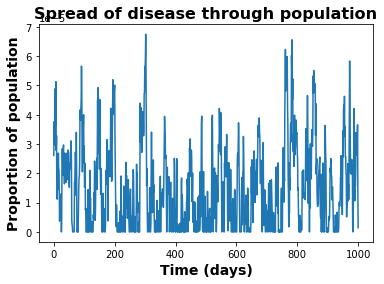

In [179]:
disease.plot_simulation(steps, step_size)

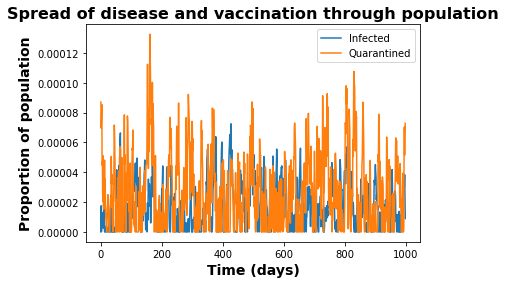

In [180]:
disease.plot_simulation_2(steps, step_size)